In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['DESCR', 'feature_names', 'target_names', 'data', 'target'])

In [2]:
print(cancer.data.shape)

(569, 30)


In [3]:
import numpy as np
print(cancer.target_names)
np.bincount(cancer.target)

['malignant' 'benign']


array([212, 357], dtype=int64)

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [6]:
from mglearn.datasets import load_extended_boston
X, y = load_extended_boston()
print(X.shape)

(506, 105)


In [7]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor")
plt.show()

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0 )

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [13]:
clf.score(X_test, y_test)

0.8571428571428571

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)
plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()
plt.show()

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [18]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [19]:
reg.score(X_test, y_test)

0.83441724462496036

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("nearest_neigbor_regression")
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, 'o')
    ax.plot(X, -3 * np.ones(len(X)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)
    
plt.show()

In [21]:
mglearn.plots.plot_linear_regression_wave()
plt.show()

w[0]: 0.393906  b: -0.031804


In [22]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [23]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [ 0.39390555]
lr.intercept_: -0.0318043430268


In [24]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.670089
test set score: 0.659337


In [25]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952353
test set score: 0.605775


In [27]:
from  sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.886058
test set score: 0.752714


In [28]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.788346
test set score: 0.635897


In [29]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928578
test set score: 0.771793


In [30]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="ridge alpa=1")
plt.plot(ridge10.coef_, 'o', label="ridge alpa=10")
plt.plot(ridge01.coef_, 'o', label="ridge alpa=01")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()
plt.show()

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: %f" % lasso.score(X_train, y_train))
print("Test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

Training set score: 0.293238
Test set score: 0.209375
number of features used: 4


In [32]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: %f" % lasso001.score(X_train, y_train))
print("Test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

Training set score: 0.896408
Test set score: 0.767806
number of features used: 32


c:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [33]:
from sklearn.linear_model import Lasso

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: %f" % lasso00001.score(X_train, y_train))
print("Test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

Training set score: 0.942433
Test set score: 0.695635
number of features used: 100


c:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [34]:
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.suptitle("linear_classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
        clf = model.fit(X, y)
        mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
        ax.scatter(X[:,0],X[:,1], c=y, s=60, cmap=mglearn.cm2)
        ax.set_title("%s" % clf.__class__.__name__)
        
plt.show()

In [36]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logisticregression = LogisticRegression().fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.953052
test set score: 0.958042


In [38]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score: %f" % logisticregression100.score(X_test, y_test))

training set score: 0.971831
test set score: 0.965035


In [39]:
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.934272
test set score: 0.930070


In [40]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()
plt.show()

In [41]:
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
          % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"
          % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(-5, 5)
plt.legend(loc=2)
plt.show()

training accuracy of L1 logreg with C=0.001000: 0.913146
test accuracy of L1 logreg with C=0.001000: 0.923077
training accuracy of L1 logreg with C=1.000000: 0.960094
test accuracy of L1 logreg with C=1.000000: 0.958042
training accuracy of L1 logreg with C=100.000000: 0.985915
test accuracy of L1 logreg with C=100.000000: 0.979021


In [42]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:,1], c=y, s=120, cmap=mglearn.cm3)
plt.show()

In [43]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.show()

In [45]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

plt.show()

In [46]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])


In [47]:
counts = {}
for label in np.unique(y): 
    counts[label] = X[y == label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [48]:
mglearn.plots.plot_animal_tree()
plt.suptitle("animal_tree")
plt.show()

In [49]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree building")
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


In [51]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


In [52]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

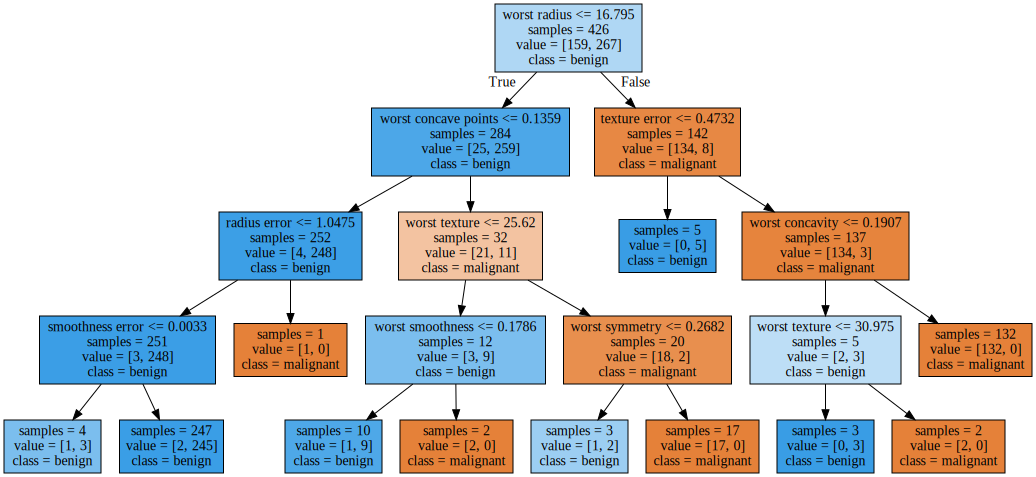

In [53]:
import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [54]:
tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01019737,  0.04839825,  0.        ,  0.        ,  0.0024156 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.72682851,  0.0458159 ,  0.        ,  0.        ,  0.0141577 ,
        0.        ,  0.018188  ,  0.1221132 ,  0.01188548,  0.        ])

In [55]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim={0,1}
plt.show()

Feature importances: [ 0.  1.]


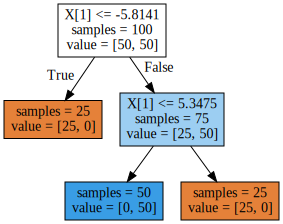

In [56]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")
tree

In [57]:
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))


accuracy on training set: 1.000000
accuracy on test set: 0.972028


In [64]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);
plt.show()

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.958042


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [67]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


In [68]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

In [69]:
plt.show()

In [70]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [71]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [72]:
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")
plt.show()

In [76]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

xx, yy = np.meshgrid(xx, yy)
zz = (coef[0] * xx + coef[1] * yy + intercept) / -coef[2]
ax.scatter(X_new[:,0], X_new[:, 1], X_new[:,2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(xx, yy,zz, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature ** 2")
plt.show()

In [78]:
zz = yy ** 2
dec = linear_svm_3d.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
plt.contourf(xx, yy, dec.reshape(xx.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [79]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none', zorder=10, linewidth=3)

In [80]:
plt.show()

In [85]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))


accuracy on training set: 1.000000
accuracy on test set: 0.629371


In [87]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")
plt.show()

In [88]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [89]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [90]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))


accuracy on training set: 0.948357
accuracy on test set: 0.951049


In [91]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))


accuracy on training set: 0.988263
accuracy on test set: 0.972028


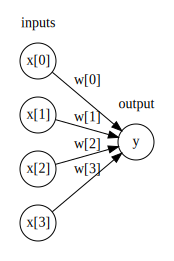

In [94]:
mglearn.plots.plot_logistic_regression_graph()


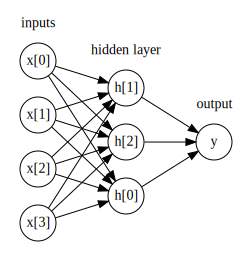

In [95]:
mglearn.plots.plot_single_hidden_layer_graph()

In [96]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")
plt.show()

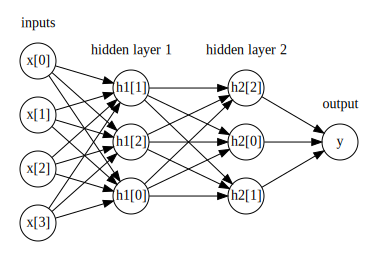

In [97]:
mglearn.plots.plot_two_hidden_layer_graph()

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(algorithm='l-bfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=69, cmap=mglearn.cm2)
plt.show()

In [100]:
mlp = MLPClassifier(algorithm='l-bfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=69, cmap=mglearn.cm2)
plt.show()

In [101]:
mlp = MLPClassifier(algorithm='l-bfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=69, cmap=mglearn.cm2)
plt.show()

In [102]:
mlp = MLPClassifier(algorithm='l-bfgs', activation='tanh',random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=69, cmap=mglearn.cm2)
plt.show()

In [104]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(algorithm='l-bfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
                      % (n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

In [105]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(algorithm='l-bfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print("accuracy on training set: %f" % mlp.score(X_train, y_train))
print("accuracy on test set: %f" % mlp.score(X_test, y_test))


accuracy on training set: 0.917840
accuracy on test set: 0.909091


In [107]:
mean_on_train = X_train.mean(axis=0)

std_on_train = X_train.std(axis=0)


X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


c:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:560: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [108]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))


accuracy on training set: 0.995305
accuracy on test set: 0.965035


In [109]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy on training set: %f" % mlp.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(X_test_scaled, y_test))


accuracy on training set: 0.988263
accuracy on test set: 0.972028


In [110]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()
plt.show()

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [112]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)


(25, 2)
(25,)


In [113]:
gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.68343075, -3.95106099, -3.6261613 ,  4.28986668,
        3.66166106])

In [114]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))


[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [115]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
np.all(pred == gbrt.predict(X_test))

True

In [116]:
decision_function = gbrt.decision_function(X_test)
np.min(decision_function), np.max(decision_function)


(-7.6909717730121798, 4.289866676868515)

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')

for ax in axes:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [118]:
gbrt.predict_proba(X_test).shape

(25, 2)

In [119]:
np.set_printoptions(suppress=True, precision=3)
gbrt.predict_proba(X_test[:6])


array([[ 0.016,  0.984],
       [ 0.843,  0.157],
       [ 0.981,  0.019],
       [ 0.974,  0.026],
       [ 0.014,  0.986],
       [ 0.025,  0.975]])

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
                                            cm='bwr', function='predict_proba')

for ax in axes:
    # plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()